<a href="https://colab.research.google.com/github/GavenDcosta/ML_codes/blob/main/HRdata_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Step 2: Load the dataset
url = '/content/HRdata.csv'  # Ensure this path is correct in your Colab environment
data = pd.read_csv(url)

# Step 3: Display the first few rows of the dataset
print(data.head())
print(data.info())
print(data.describe())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

In [3]:
# Step 4: Preprocess the data
# Drop non-numeric columns and handle categorical variables
data = pd.get_dummies(data, columns=['sales', 'salary'], drop_first=True)  # One-hot encode categorical variables
X = data.drop(['left'], axis=1)  # Features
y = data['left']  # Target variable

# Step 5: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# Step 6: Apply PCA
pca = PCA(n_components=2)  # You can change the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Step 7: Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = y.values


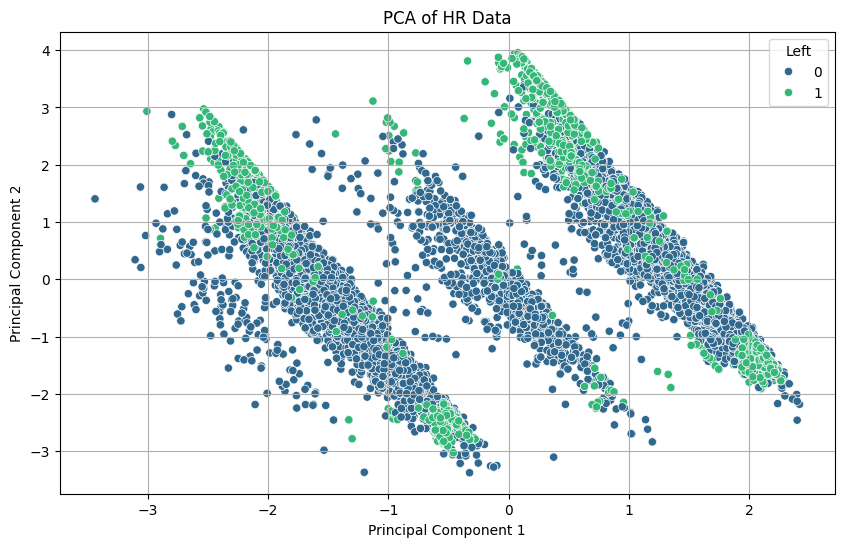

In [5]:
# Step 8: Visualize the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Target', data=pca_df, palette='viridis')
plt.title('PCA of HR Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Left')
plt.grid()
plt.show()



In [6]:
# Step 9: Explained Variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance by Principal Component 1: {explained_variance[0]:.2f}')
print(f'Explained Variance by Principal Component 2: {explained_variance[1]:.2f}')

Explained Variance by Principal Component 1: 0.10
Explained Variance by Principal Component 2: 0.10
